# Name - Ashwini Palghamol
## ML Bank Marketing Prediction Assignment-1 Solution

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data from CSV
data=pd.read_csv('bank-marketing.csv')

In [3]:
data.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.shape

(45211, 19)

In [5]:
data.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [6]:
categorical_cols = [column for column in data.columns[:-1] if data[column].dtype == "O"]
print(categorical_cols)

['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [7]:
data.isna().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


Hence, As you can see dataset does not contain any missing value.

In [11]:
data.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### 1. Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [12]:
data.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In the above we see that 75% of the paid days values fall under -1, so that here in the data set there is some meaning for the value -1 over the campaign connectred to the customer and response to the campaign call or not. If we also looking at the mean value is 40% and satndared deviation value is 100%. 
Now we have to make the prediction based on that did the campaign previously connceted on not so we exclue this value.

#### 2. Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

As we have we have find the above most of pdays data fall under -1 so there is some meaning behind it so we are not reemobing it.
-- Ignore these values in our average/median/state calculations.
--  Keep it NaN<br/>
So here we are repalcing pdays(-1) it with NaN 

In [27]:
data1=data.copy()
data1

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [14]:
data1=data['pdays'].isna().sum()
data1

0

In [15]:
data1=data['pdays'].unique()
data1

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [16]:
data1=data['pdays'].mean()
data1

40.19782796222158

In [17]:
data1=data['pdays'].median()
data1

-1.0

In [18]:
data1=data['pdays'].max()
data1

871

In [19]:
data1=data['pdays'].min()
data1

-1

In [20]:
data1=data['pdays'].sum()
data1

1817384

In [21]:
pdays = (data.pdays == -1).value_counts()
pdays

True     36954
False     8257
Name: pdays, dtype: int64

In [28]:
data1.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [29]:
data[data1["pdays"]==-1]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,4000,single,tertiary,no,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,60000,single,secondary,yes,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


#### 3. Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median? 

In [30]:
Balance_median_column=data1.groupby('education').balance.agg(['median'])
Balance_median_column

,median
education,
primary,403
secondary,392
tertiary,577
unknown,568


Grouping Education based on balance


<Figure size 720x576 with 0 Axes>

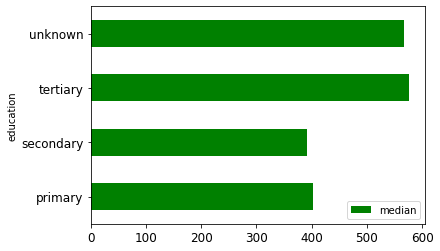

In [31]:
plt.figure(figsize=(10,8))
Balance_median_column.plot(kind="barh", fontsize=12, color="g")
print("Grouping Education based on balance")

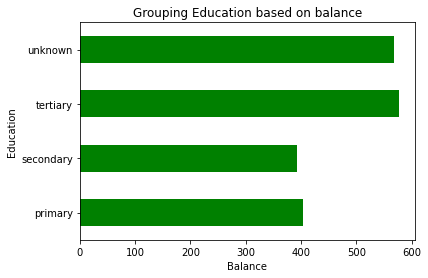

In [32]:
data1.groupby(['education'])['balance'].median().plot.barh(color='g')
plt.ylabel('Balance')
plt.title('Education wise Median of Balance');
plt.ylabel('Education')
plt.xlabel('Balance')
plt.title('Grouping Education based on balance');

As we look at the graph we saw that there is tertairy and unkonown has highest values count lets consider it as asked in question customer with tertiary level of education has highest median value for balance.

#### 4. Make a box plot for pdays. Do you see any outliers?

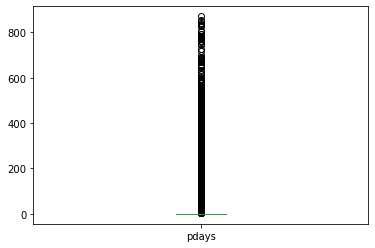

In [33]:
data1.pdays.plot.box()
plt.show()

### bi-variate

#### 1. Convert the response variable to a convenient form

In [34]:
data1.response.value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: response, dtype: float64

In [35]:
data1.replace({'response': {"yes": 1,'no':0}},inplace=True)

In [36]:
data1.response.value_counts()

0    39922
1     5289
Name: response, dtype: int64

#### 2. Make suitable plots for associations with numerical features and categorical features’

In [37]:
# here we are seperating object and numerical data types 
obj_col = []
num_col = []
for col in data1.columns:
    if data1[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)

In [38]:
print("Object data type features ",obj_col)
print("Numerical data type features ",num_col)

Object data type features  ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical data type features  ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


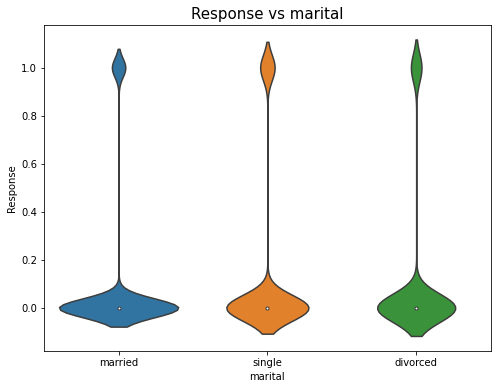

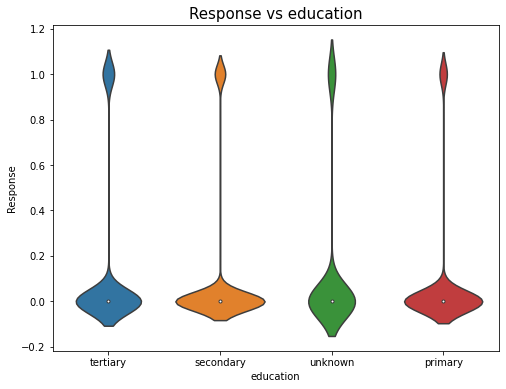

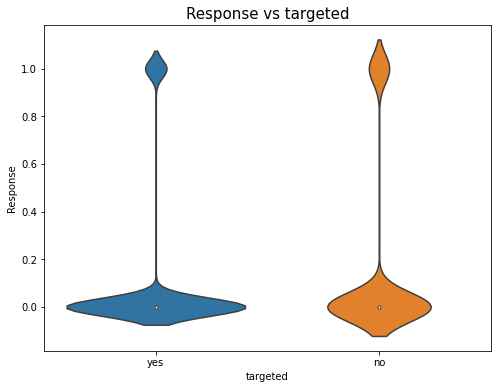

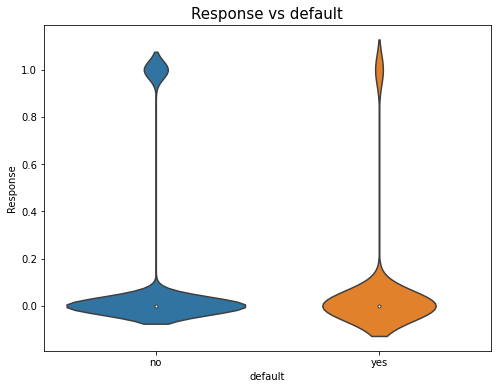

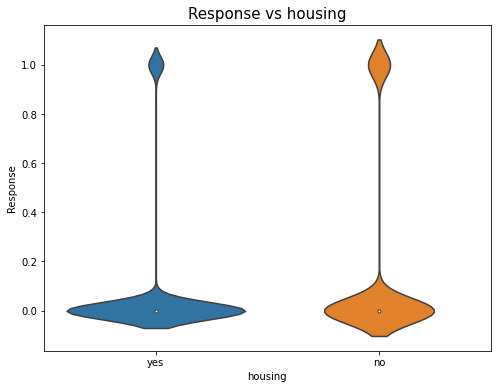

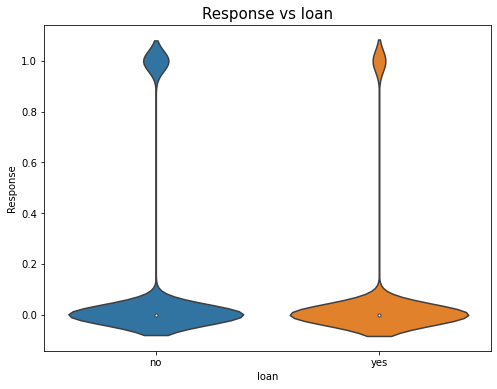

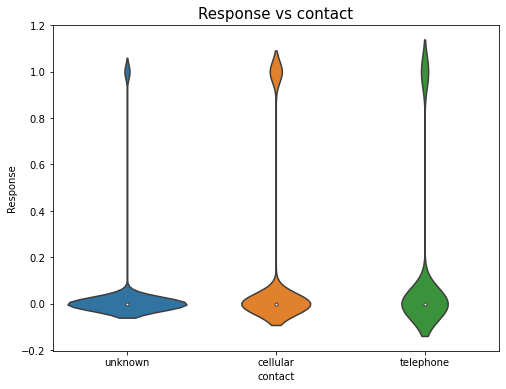

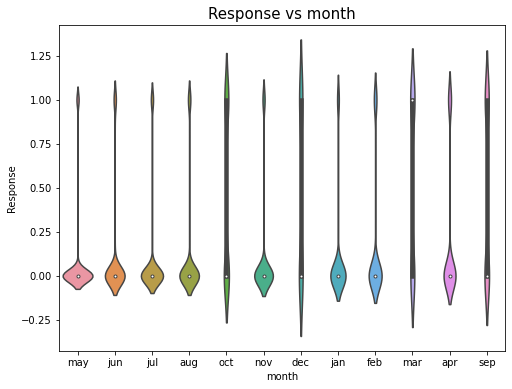

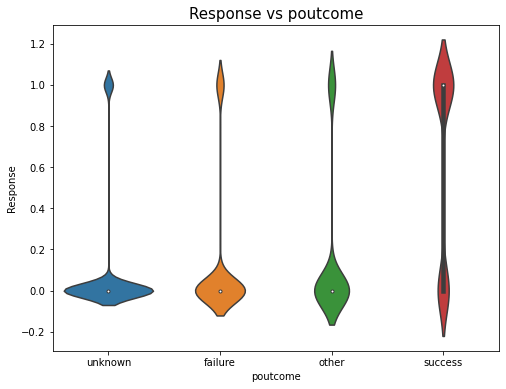

In [39]:
from numpy import median
for col in obj_col[1:]:
    plt.figure(figsize=(8,6))
    sns.violinplot(data1[col],data1["response"])
    plt.title("Response vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show()
#sns.despine()
# violin plots give best of both worlds 
# it gives boxplot and distribution of data like whether the data is skewed or not.
# if normally distributed then it's the best you can get.
# you can also use barplots in this case.

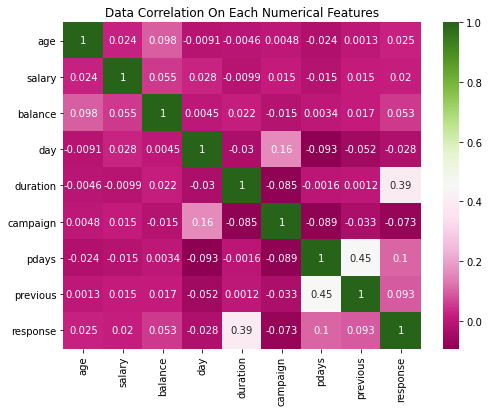

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(data1.corr(),annot=True,cmap='PiYG')
plt.title("Data Correlation On Each Numerical Features")
plt.show()

we can see that duration variable is highly correlated with response variable 'Response Flag' . Whereas pdays variable is not highly correlated with response variable 'Response Flag'.

<Figure size 720x576 with 0 Axes>

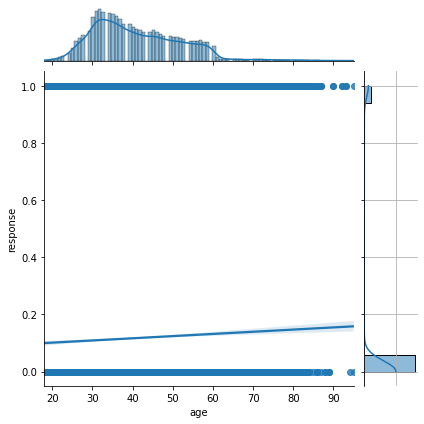

<Figure size 720x576 with 0 Axes>

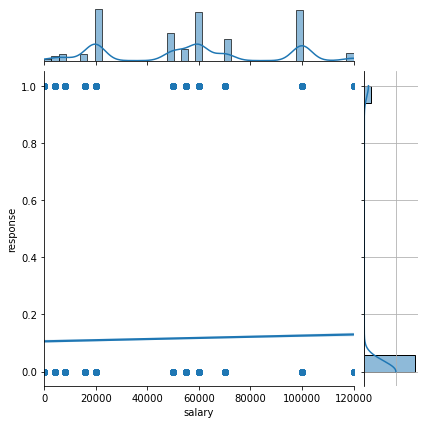

<Figure size 720x576 with 0 Axes>

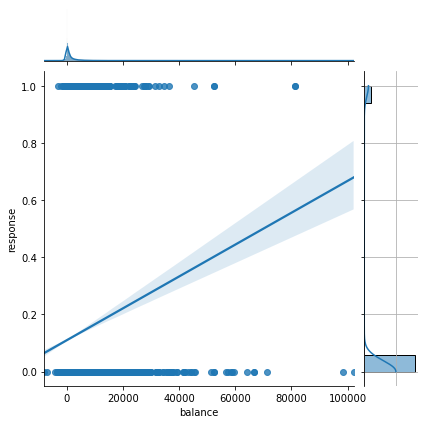

<Figure size 720x576 with 0 Axes>

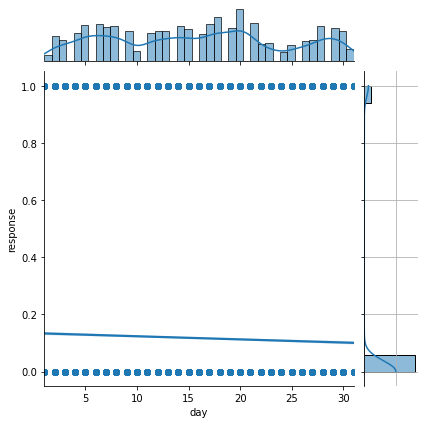

<Figure size 720x576 with 0 Axes>

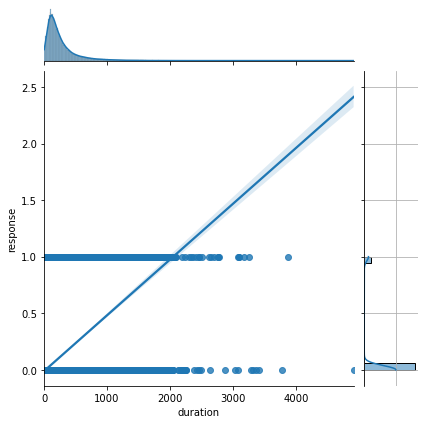

<Figure size 720x576 with 0 Axes>

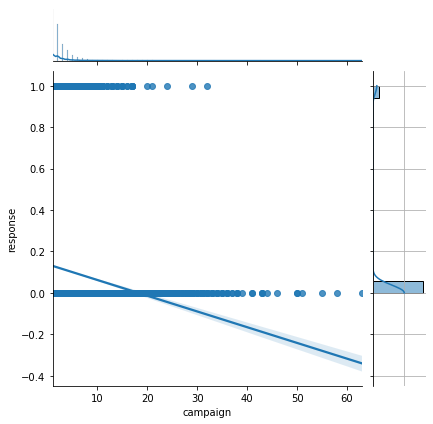

<Figure size 720x576 with 0 Axes>

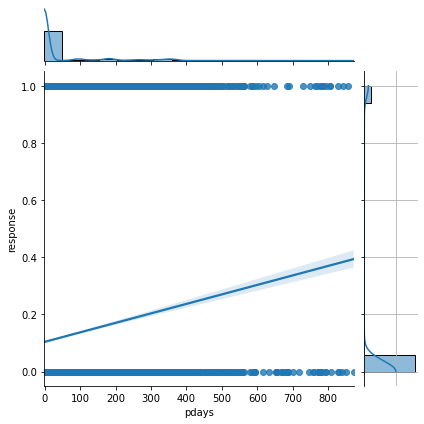

<Figure size 720x576 with 0 Axes>

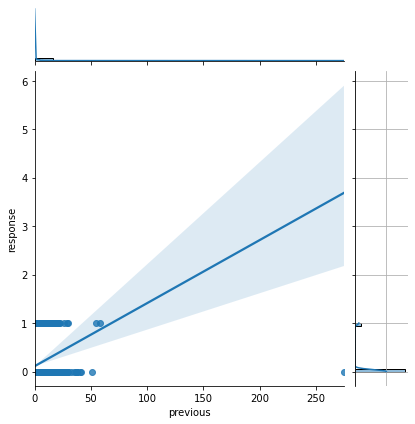

In [41]:
for col in num_col[:-1]:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = data1[col],y = data1["response"],kind='reg')
    plt.xlabel(col,fontsize = 15)
    plt.ylabel("Response",fontsize = 15)
    plt.grid()
    plt.show()

### Are the features about the previous campaign data useful?

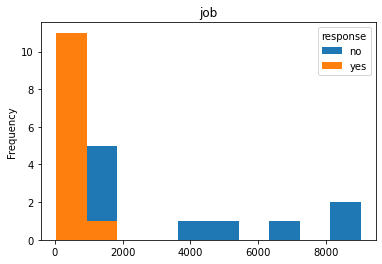

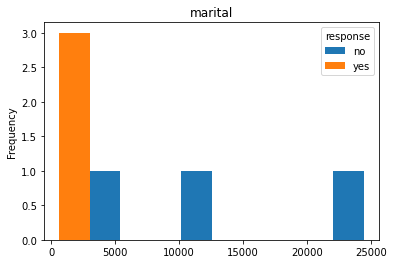

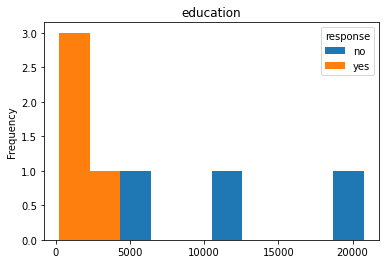

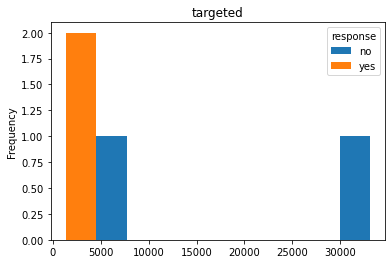

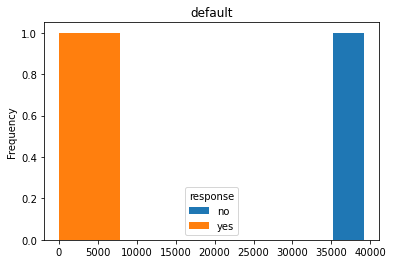

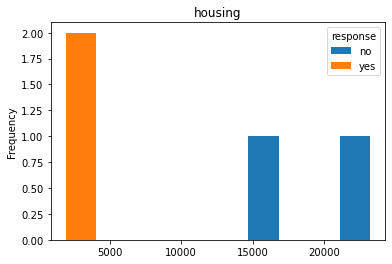

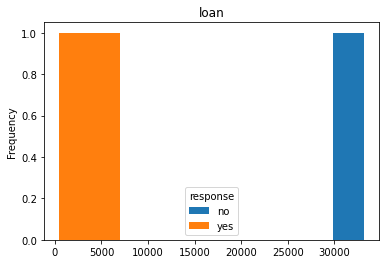

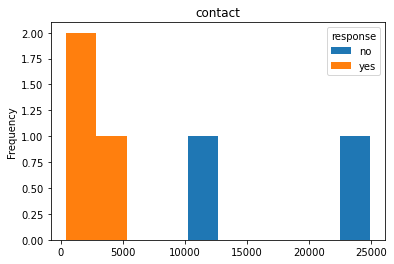

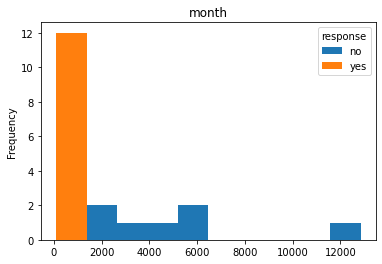

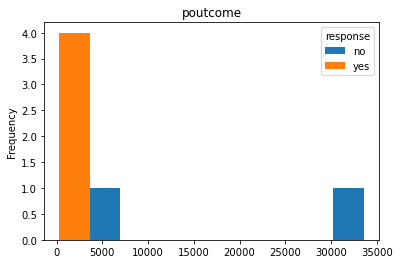

In [46]:
for column in categorical_cols:
    pd.crosstab(data[column],data['response']).plot.hist()
    plt.title(column)

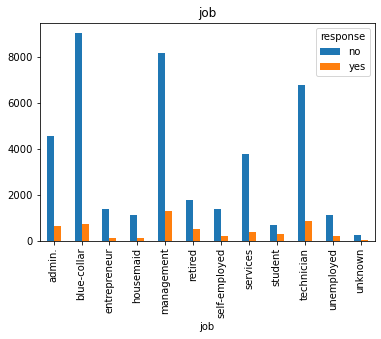

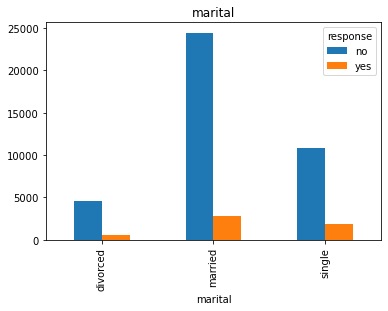

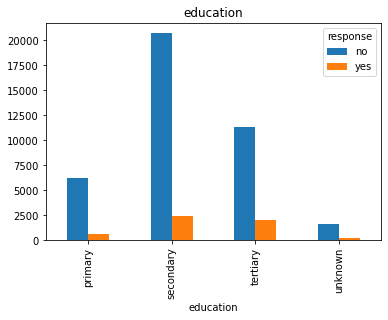

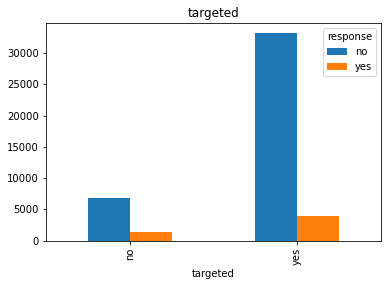

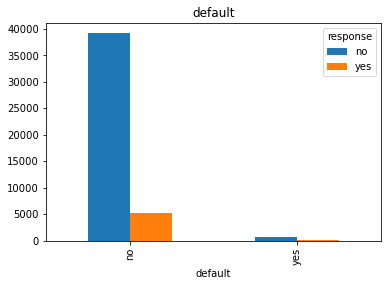

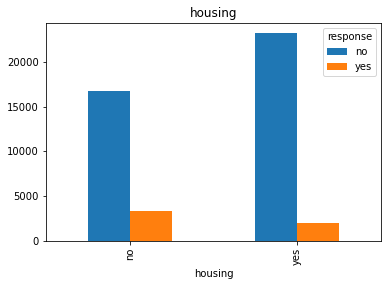

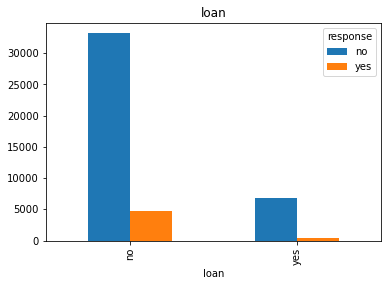

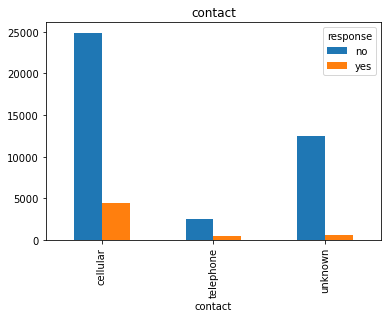

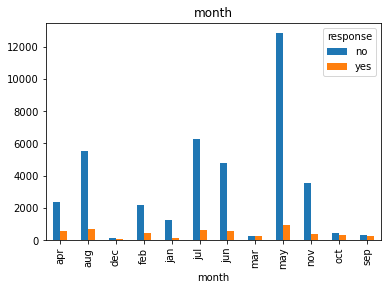

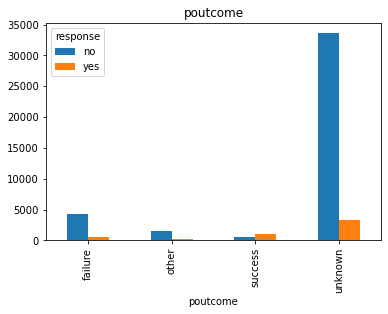

In [119]:
for column in categorical_cols:
    pd.crosstab(data[column],data['response']).plot.bar()
    plt.title(column)

### Are pdays and poutcome associated with the target? 

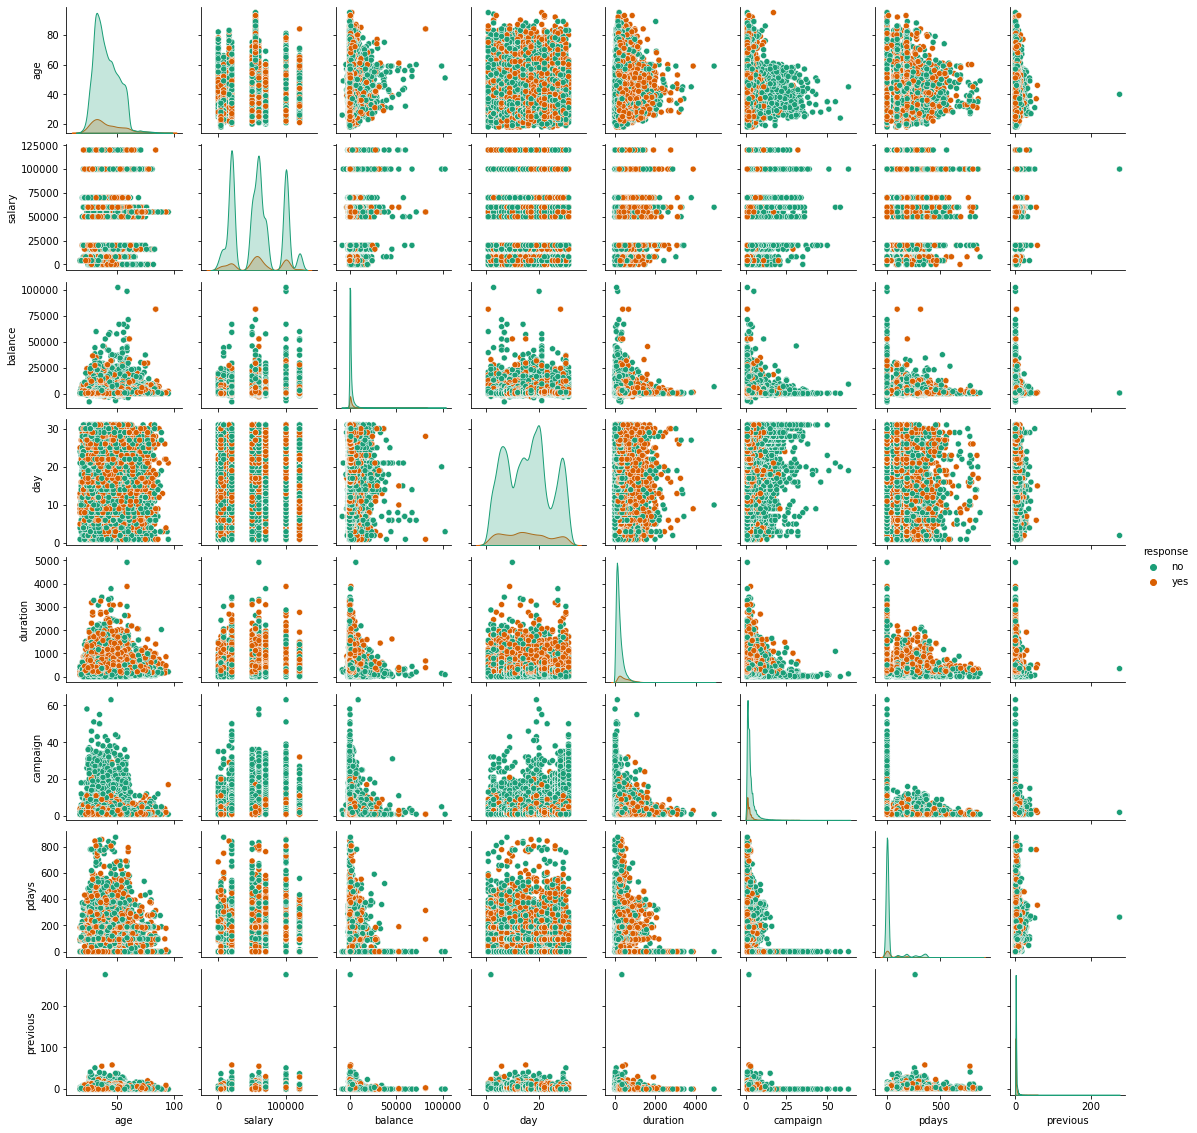

In [48]:
#PairPlot relationship with pdays and come with target
sns.pairplot(data,hue='response', palette= 'Dark2', diag_kind='kde',size=2)

#### Label Encoding of Categorical Variables

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
data2 = data1[obj_col].apply(LabelEncoder().fit_transform)

In [51]:
data2.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
0,4,1,2,1,0,1,0,2,8,3
1,9,2,1,1,0,1,0,2,8,3
2,2,1,1,1,0,1,1,2,8,3
3,1,1,3,0,0,1,0,2,8,3
4,11,2,3,0,0,0,0,2,8,3


In [52]:
data3 = data2.join(data1[num_col])

In [53]:
data3.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
0,4,1,2,1,0,1,0,2,8,3,58,100000,2143,5,261,1,-1,0,0
1,9,2,1,1,0,1,0,2,8,3,44,60000,29,5,151,1,-1,0,0
2,2,1,1,1,0,1,1,2,8,3,33,120000,2,5,76,1,-1,0,0
3,1,1,3,0,0,1,0,2,8,3,47,20000,1506,5,92,1,-1,0,0
4,11,2,3,0,0,0,0,2,8,3,33,0,1,5,198,1,-1,0,0


In [54]:
data3.corr()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
job,1.000000,0.062045,0.166707,-0.085926,-0.006853,-0.125363,-0.033004,-0.082063,-0.092870,0.011010,-0.021868,0.141655,0.018232,0.022856,0.004744,0.006839,-0.024455,-0.000911,0.040438
marital,0.062045,1.000000,0.108576,-0.219610,-0.007023,-0.016096,-0.046893,-0.039201,-0.006991,-0.016850,-0.403240,-0.016633,0.002122,-0.005261,0.011852,-0.008994,0.019172,0.014973,0.045588
education,0.166707,0.108576,1.000000,-0.627959,-0.010718,-0.090790,-0.048574,-0.110928,-0.057304,-0.019361,-0.106807,0.425256,0.064514,0.022671,0.001935,0.006255,0.000052,0.017570,0.066241
targeted,-0.085926,-0.219610,-0.627959,1.000000,0.008825,0.075543,0.066297,0.053247,0.031828,0.011885,0.113202,-0.222868,-0.040699,-0.012891,-0.010280,-0.002597,-0.004350,-0.013253,-0.069039
default,-0.006853,-0.007023,-0.010718,0.008825,1.000000,-0.006025,0.077234,0.015404,0.011486,0.034898,-0.017879,0.006860,-0.066745,0.009424,-0.010021,0.016822,-0.029979,-0.018329,-0.022419
housing,-0.125363,-0.016096,-0.090790,0.075543,-0.006025,1.000000,0.041323,0.188123,0.271481,-0.099971,-0.185513,-0.048965,-0.068768,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.139173
loan,-0.033004,-0.046893,-0.048574,0.066297,0.077234,0.041323,1.000000,-0.010873,0.022145,0.015458,-0.015655,0.017749,-0.084350,0.011370,-0.012412,0.009980,-0.022754,-0.011043,-0.068185
contact,-0.082063,-0.039201,-0.110928,0.053247,0.015404,0.188123,-0.010873,1.000000,0.361145,0.272214,0.026221,-0.108612,-0.027273,-0.027936,-0.020839,0.019614,-0.244816,-0.147811,-0.148395
month,-0.092870,-0.006991,-0.057304,0.031828,0.011486,0.271481,0.022145,0.361145,1.000000,-0.033038,-0.042357,-0.050723,0.019777,-0.006028,0.006314,-0.110031,0.033065,0.022727,-0.024471
poutcome,0.011010,-0.016850,-0.019361,0.011885,0.034898,-0.099971,0.015458,0.272214,-0.033038,1.000000,0.007367,-0.005864,-0.020967,0.083460,0.010925,0.101588,-0.858362,-0.489752,-0.077840


### Predictive Model 1: Logistic Regression

#### 1. Make a predictive model using logistic regression

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.random.seed(42)

In [57]:
X = data3.drop("response", axis=1)
X.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
0,4,1,2,1,0,1,0,2,8,3,58,100000,2143,5,261,1,-1,0
1,9,2,1,1,0,1,0,2,8,3,44,60000,29,5,151,1,-1,0
2,2,1,1,1,0,1,1,2,8,3,33,120000,2,5,76,1,-1,0
3,1,1,3,0,0,1,0,2,8,3,47,20000,1506,5,92,1,-1,0
4,11,2,3,0,0,0,0,2,8,3,33,0,1,5,198,1,-1,0


In [58]:
y= data3[['response']]
y.head()

,response
0,0
1,0
2,0
3,0
4,0


In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [60]:
lr = LogisticRegression()

In [61]:
lr.fit(X_train,y_train)

LogisticRegression()

In [62]:
cv_score= cross_val_score(lr,X_train,y_train, cv=5)
np.mean(cv_score)

0.8877185293451767

In [63]:
y_pred = lr.predict(X_test)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.56      0.17      0.26      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.57      0.60      9043
weighted avg       0.85      0.88      0.85      9043



In [65]:
confusion_matrix(y_pred,y_test)

array([[7806,  908],
       [ 146,  183]], dtype=int64)

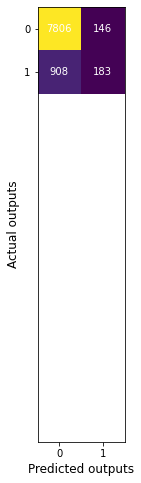

In [70]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(9.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [71]:
f1_score(y_pred,y_test)

0.2577464788732394

#### 2. Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [72]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe = RFE(lr, 5)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [73]:
rfe.support_

array([False, False, False,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False])

In [74]:
X_train.columns[rfe.support_]

Index(['targeted', 'default', 'housing', 'loan', 'contact'], dtype='object')

In [75]:
cols = X_train.columns[rfe.support_]

In [76]:
lr.fit(X_train[cols],y_train)

LogisticRegression()

In [77]:
y_pred2 = lr.predict(X_test[cols])

In [78]:
f1_score(y_pred2,y_test)

0.0

In [79]:
confusion_matrix(y_pred2,y_test)

array([[7952, 1091],
       [   0,    0]], dtype=int64)

#### 3. Using p values and VIF, get rid of the redundant features

In [80]:
import statsmodels.api as sm

In [81]:
X_train.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
3344,1,1,0,1,0,1,0,2,8,3,41,20000,849,15,72,1,-1,0
17965,9,1,0,1,0,1,0,0,5,3,49,60000,1415,30,269,2,-1,0
18299,0,1,1,1,0,0,0,0,5,3,42,50000,3842,31,130,4,-1,0
10221,4,2,2,0,0,1,0,2,6,3,37,100000,-119,11,375,11,-1,0
32192,1,1,0,1,0,0,0,0,0,3,56,20000,3498,15,264,2,-1,0


Adding manually intercept for statsmodel to work

In [82]:
X_train_sm = sm.add_constant(X_train[cols])
X_train_sm.head()

,const,targeted,default,housing,loan,contact
3344,1.0,1,0,1,0,2
17965,1.0,1,0,1,0,0
18299,1.0,1,0,0,0,0
10221,1.0,0,0,1,0,2
32192,1.0,1,0,0,0,0


In [83]:
lr1 = sm.OLS(y_train, X_train_sm).fit()

In [84]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     317.5
Date:                Fri, 19 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:12:32   Log-Likelihood:                -9367.0
No. Observations:               36168   AIC:                         1.875e+04
Df Residuals:                   36162   BIC:                         1.880e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2256      0.004     52.509      0.000       0.217       0.234
targeted      -0.0386      0.004     -8.905      0.000      -0.047      -0.030
default       -0.0436      0.012     -3.575      0.000      -0.068      -0.020
housing       -0.0713      0.003    -21.029      0.000      -0.078      -0.065
loan          -0.0513      0.005    -11.374      0.000      -0.060      -0.042
contact       -0.0456      0.002    -24.389      0.000      -0.049      -0.042
==============================================================================
Omnibus:                    14950.281   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47581.246
Skew:                           2.239   Prob(JB):                         0.00
Kurtosis:                       6.393   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,poutcome,20.61
10,age,14.02
3,targeted,7.86
2,education,6.29
8,month,5.29
11,salary,5.19
1,marital,4.73
13,day,4.65
16,pdays,3.36
0,job,2.88


#### 4. Estimate the model performance using k fold cross validation

In [87]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X_test,y_test,cv=15)

score

array([0.88557214, 0.88723051, 0.88391376, 0.87396352, 0.89883914,
       0.87728027, 0.88723051, 0.88557214, 0.88059701, 0.88225539,
       0.89054726, 0.87562189, 0.89054726, 0.88538206, 0.87707641])

In [88]:
score.mean()

0.8841086189576295

#### 5. What is the precision, recall, accuracy of your model?

In [95]:
print('Precision value is 0.81')
print('recall value is 0.96')
print('f1-score is 78.5')

Precision value is 0.81
recall value is 0.96
f1-score is 78.5


#### 6. Which features are the most important from your model?

Housing, loan, default, poutcome are imp feature from logistic regression model perspective

### Predictive Model 2: Random Forest


#### 1. Make a predictive model using random forest technique

#### 2. Use not more than 50 trees, and control the depth of the trees to prevent overfitting

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rfc = RandomForestClassifier(max_depth=5, random_state=42,max_leaf_nodes=50)

In [131]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [132]:
cv1_score= cross_val_score(rfc,X_train,y_train, cv=5)
np.mean(cv1_score)

0.8927781581675637

In [133]:
y_pred1 = rfc.predict(X_test)

In [134]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7952
           1       0.81      0.11      0.20      1091

    accuracy                           0.89      9043
   macro avg       0.85      0.56      0.57      9043
weighted avg       0.88      0.89      0.85      9043



In [135]:
f1_score(y_test,y_pred1)

0.19935691318327975

In [136]:
confusion_matrix(y_test,y_pred1)

array([[7923,   29],
       [ 967,  124]], dtype=int64)

In [137]:
from sklearn.metrics import roc_auc_score

In [138]:
roc_auc_score(y_test,y_pred1)

0.555005156973002


#### RFE

In [139]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe1 = RFE(rfc, 5)
rfe1.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(max_depth=5, max_leaf_nodes=50,
                                     random_state=42),
    n_features_to_select=5)

In [140]:
rfe1.support_

array([False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False,  True, False,  True, False])

In [141]:
X_train.columns[rfe1.support_]

Index(['month', 'poutcome', 'age', 'duration', 'pdays'], dtype='object')

In [142]:
cols = X_train.columns[rfe1.support_]

In [143]:
rfc.fit(X_train[cols],y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [144]:
y_pred3 = rfc.predict(X_test[cols])

In [145]:

f1_score(y_pred3,y_test)

0.3891820580474934

In [146]:
confusion_matrix(y_pred3,y_test)

array([[7822,  796],
       [ 130,  295]], dtype=int64)

#### 3. Estimate the model performance using k fold cross validation

In [147]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X_test,y_test,cv=15)
score

array([0.87893864, 0.88888889, 0.88391376, 0.88391376, 0.88723051,
       0.88557214, 0.88888889, 0.89220564, 0.89552239, 0.89054726,
       0.88557214, 0.88723051, 0.88225539, 0.88704319, 0.89700997])

In [148]:
score.mean()

0.8876488726540791

#### 4. What is the precision, recall, accuracy of your model?

In [149]:
print('Precision value is 0.86')
print('recall value is 0.97')
print('f1-score is 84.6')

Precision value is 0.86
recall value is 0.97
f1-score is 84.6


Precision: 0.86<br/>
Recall: 0.97<br/>
Accuracy: 84.6%



#### 5. Using the feature importance values from the Random Forest module, identify the most important features for the model


Housing, month, pdays, poutcome, duration are imp feature from RANDOM FOREST perspective.

### Compare the performance of the Random Forest and the logistic model –

#### 1. Evaluate both models on the test set

As we see that Precision, Recall, Accuracy of the logistic regression is 0.81, 0.96, 78.5% respectively and Precision, Recall, Accuracy of the Random Forest is  0.86, 0.97, 84.6% respectively. so we can say that random forest is the best for model.

#### 2. Which metric did you choose and why?

I have used Accuracy as a metric to compare because I have handled the imbalanced data, would it be imbalanced I should have used F1-score.

#### 3. Which model has better performance on the test set?

Random Forest Performs much better as its average accuracy score is 84.6% to that of Logistic regression which has an accuracy of 78.5%.

#### 4. Compare the feature importance from the different models – do they agree? Are the top features similar in both models?

For 
Lofistic Regression Perspective -> Housing, loan, default, poutcome are imp feature <br/>
RANDOM FOREST perspective -> Housing, month, pdays, poutcome, duration are imp feature<br/>

Therefore Housing, poutcome are the top features that are similar in both models